c:\Users\chldb\anaconda3\envs\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


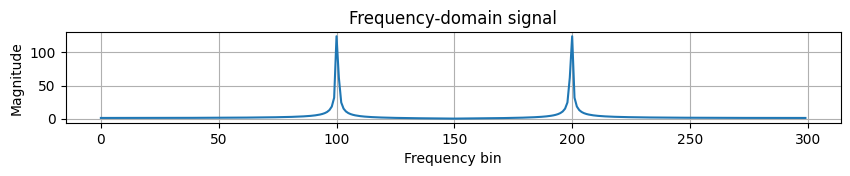

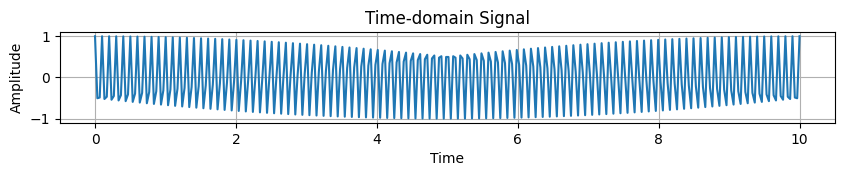

In [1]:
import torch.fft
import math
import matplotlib.pyplot as plt

N = 300  # number of samples
fs = 30  # sampling frequency
T = 1 / fs  # sampling period


t = torch.linspace(0, N*T, N)
f0 = 10
x = torch.cos(2 * math.pi * f0 * t)

x_fft = torch.fft.fft(x)
spectrum = torch.abs(x_fft)


plt.figure(figsize=(10, 4))
plt.subplot(3, 1, 1)
plt.plot(spectrum)
plt.title("Frequency-domain signal")
plt.xlabel("Frequency bin")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.subplot(3, 1, 2) 
plt.plot(t, x)
plt.title("Time-domain Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)

c:\Users\chldb\anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at  ..\aten\src\ATen\native\Copy.cpp:162.)
  import sys


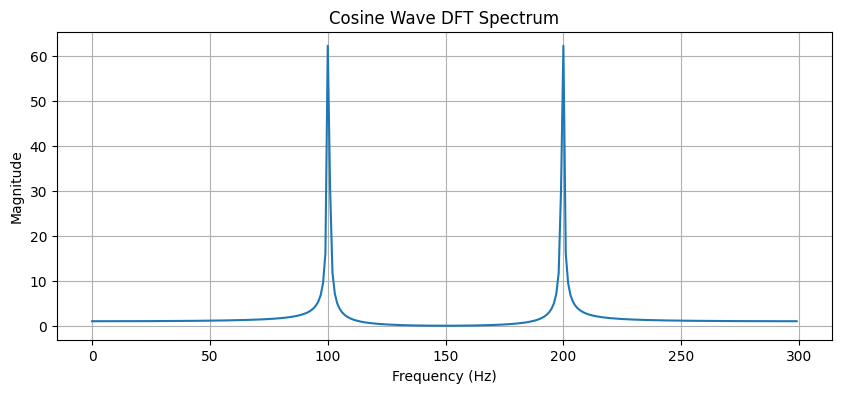

In [3]:
import numpy as np

def dft(x):
    N = len(x)
    X = torch.zeros(N)
    for k in range(N):
        X[k] = sum(x[n] * np.exp(-2j * math.pi * k * n / N) for n in range(N))
    return X

x_dft = dft(x)
dft_spectrum = torch.abs(x_dft)

plt.figure(figsize=(10, 4))
plt.plot(dft_spectrum)
plt.title("Cosine Wave DFT Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()


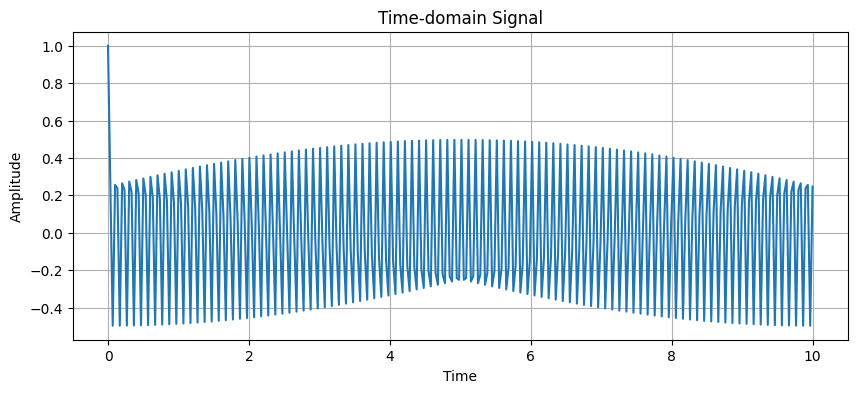

In [6]:
def idft(X):
    N = len(X)
    x = torch.zeros(N, dtype=torch.complex64)  
    for n in range(N):
        for k in range(N):
            x[n] += X[k] * np.exp(2j * np.pi * k * n / N)  
    return x / N


x_idft = idft(x_dft)
plt.figure(figsize=(10, 4))
plt.plot(t, x_idft)
plt.title("Time-domain Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()